In [1]:
# Imporing the Librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization
from keras.layers import Dense,Dropout,Flatten,Activation
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Base path
data=r"C:\Users\Dell\Desktop\CloudSEK\TrainingSet\TrainingSet"

In [3]:
# using ImageGenerator to load the images
image_data= {"train": ImageDataGenerator(horizontal_flip=True,rescale=1/255,
                                         validation_split=0.2,shear_range=0.2,
                                         zoom_range=0.2,).flow_from_directory(directory=data,
                                                                              target_size=(256,256),
                                                                              subset="training"),
             "valid": ImageDataGenerator(rescale=1/255,validation_split=0.2,
                                         ).flow_from_directory(directory=data,target_size=(256,256),
                                                               subset="validation",),
             }

Found 800 images belonging to 3 classes.
Found 200 images belonging to 3 classes.


In [4]:
# using sequential ti build a cnn
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.20))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 dropout (Dropout)           (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 524288)            0

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dropout(0.30))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 flatten_2 (Flatten)         (None, 1048576)          

In [15]:
# Setting variables for the model
batch_size = 32
epochs = 10

In [16]:
# Seperating Training and Testing Data
train_generator = image_data["train"]
valid_generator = image_data["valid"]

In [17]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

In [18]:
print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 25
validation_steps : 6


In [19]:
# File Path to store the trained models
filepath = "C:\\Users\\Dell\\Desktop\\cloudsek\\model_{epoch:02d}-{val_accuracy:.2f}.h5"

In [20]:
# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [21]:
callbacks_list = [checkpoint1]

In [22]:
# building the model
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
25/25 [==============================] - ETA: 0s - loss: 36.0387 - accuracy: 0.4913
Epoch 1: val_accuracy improved from -inf to 0.55729, saving model to C:\Users\Dell\Desktop\cloudsek\model_01-0.56.h5
25/25 [==============================] - 263s 10s/step - loss: 36.0387 - accuracy: 0.4913 - val_loss: 1.7458 - val_accuracy: 0.5573
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 5.1635 - accuracy: 0.6375
Epoch 2: val_accuracy improved from 0.55729 to 0.68750, saving model to C:\Users\Dell\Desktop\cloudsek\model_02-0.69.h5
25/25 [==============================] - 274s 11s/step - loss: 5.1635 - accuracy: 0.6375 - val_loss: 0.8124 - val_accuracy: 0.6875
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 3.5739 - accuracy: 0.6837 
Epoch 3: val_accuracy improved from 0.68750 to 0.73438, saving model to C:\Users\Dell\Desktop\cloudsek\model_03-0.73.h5
25/25 [==============================] - 305s 12s/step - loss: 3.5739 - accuracy: 0.6837 - val_l

In [24]:
# taking the records of accuracy and val_accuracy
accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

In [25]:
# taking the records of loss and val_loss
loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Acuuracy of Training and Validation')

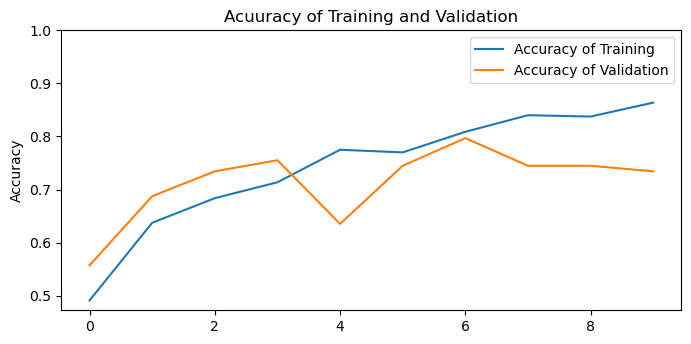

In [28]:
# accuracy and val_accuracy plots
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Accuracy of Training')
plt.plot(val_accuracy, label='Accuracy of Validation')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Acuuracy of Training and Validation')

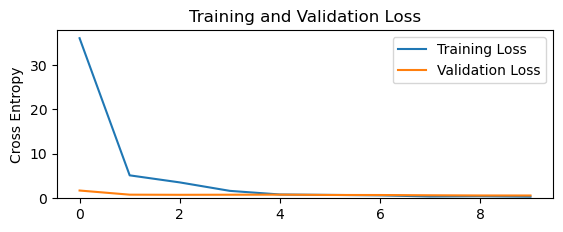

In [29]:
# loss and val_loss plots
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [34]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(valid_generator)


7/7 [==============================] - 14s 2s/step - loss: 0.6409 - accuracy: 0.7300


In [33]:
print(test_acc)

0.7300000190734863
